<a href="https://colab.research.google.com/github/corwinstites/1.125_PS4/blob/main/STITES_PS4_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [126]:
# Read in data, select the relevant data to train on, replace all NaN values with 0, display the head of the data
data = pd.read_csv('https://raw.githubusercontent.com/corwinstites/1.125_PS4/main/train.csv')
train = data.iloc[:,:]
train.fillna(value = 0.0,inplace = True)
#train.head()
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,MnPrv,0.0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,6,2008,WD,Normal,147500


In [127]:
# Select only numeric values and show the dimensions
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1460, 38)

In [128]:
# Select and display all the coorelating factors
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:38].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'GarageYrBlt',
       'BsmtFullBath', 'BsmtUnfSF', 'LotFrontage', 'BedroomAbvGr',
       'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [129]:
# Make Y the recorded sales price, make X all other metrics
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
0,7,1710,2,548,856,856,2,8,2003,2003,...,0,0,0,1,0,2008,5,60,0,1
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,0,1,0,2,0,2007,8,20,0,1
2,7,1786,2,608,920,920,2,6,2001,2002,...,0,0,0,3,0,2008,5,60,0,1
3,7,1717,3,642,756,961,1,7,1915,1970,...,0,0,0,4,0,2006,5,70,272,1
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,0,0,0,5,0,2008,5,60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,...,0,0,0,1456,0,2007,5,60,0,1
1456,6,2073,2,500,1542,2073,2,7,1978,1988,...,163,0,0,1457,0,2010,6,20,0,1
1457,7,2340,1,252,1152,1188,2,9,1941,2006,...,0,0,2500,1458,0,2010,9,70,0,1
1458,5,1078,1,240,1078,1078,1,5,1950,1996,...,1029,0,0,1459,0,2010,6,20,112,1


In [130]:
# Build a Linear Regression Model using the recorded sales price and the correlating factors
from sklearn import linear_model
import sklearn
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [131]:
# Find out how good the model is
model.score(X,Y)

0.8164275651873067

In [132]:
# Find the root mean squared of the model's predictions
math.sqrt(sklearn.metrics.mean_squared_error(Y,predictions))

34025.76283437996

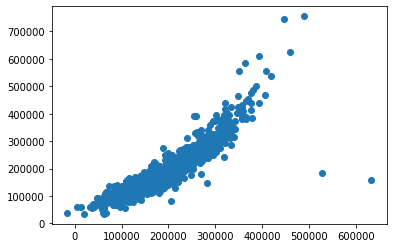

In [133]:
# Make a scatter plot of predictions
plt.scatter(predictions, Y)

In [134]:
# Put predicitons into a data structure
input = {'ID': np.arange(1,len(predictions)+1), 'SalePrice': predictions}
predictions = pd.DataFrame(data=input)
predictions

,ID,SalePrice
0,1,227286.821820
1,2,196557.960532
2,3,222772.940617
3,4,199845.358397
4,5,295401.289520
...,...,...
1455,1456,182263.836292
1456,1457,245710.215932
1457,1458,223960.774375
1458,1459,131513.956535


In [135]:
# Save the data structure
from pathlib import Path  
predictions.to_csv('predictions.csv')